# Importing Dataset and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic=sns.load_dataset('titanic')

# Data Understanding

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Cleaning

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic['age'].fillna(np.mean(titanic['age']),inplace=True)

<ipython-input-6-0729f01a445f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(np.mean(titanic['age']),inplace=True)


In [ ]:
titanic['age'].isnull().sum()

0

In [ ]:
titanic.fillna(method='ffill',inplace=True)

<ipython-input-8-96dd793a8b91>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic.fillna(method='ffill',inplace=True)


In [ ]:
titanic.fillna(method='bfill',inplace=True)

<ipython-input-9-b996e659ffee>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic.fillna(method='bfill',inplace=True)


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Exploratory Data Analysis

## Single Variable  Non-Graphical Summary

In [ ]:
numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns
skewness = titanic[numeric_cols].skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
survived    0.478523
pclass     -0.630548
age         0.434488
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64


In [ ]:
print("Total fare :",titanic['fare'].sum())
print("Minimum fare :",titanic['fare'].min())
print("Maximum fare :",titanic['fare'].max())
print("Average fare :",titanic['fare'].mean())

Total fare : 28693.9493
Minimum fare : 0.0
Maximum fare : 512.3292
Average fare : 32.204207968574636


In [ ]:
titanic.query('fare>50')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,D,Southampton,yes,False
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,D,Southampton,no,False
867,0,1,male,31.000000,0,0,50.4958,S,First,man,True,A,Southampton,no,True
871,1,1,female,47.000000,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


In [ ]:
titanic.query('fare>50').count()

,0
survived,160
pclass,160
sex,160
age,160
sibsp,160
parch,160
fare,160
embarked,160
class,160
who,160


In [ ]:
titanic.value_counts('class')

,count
class,
Third,491
First,216
Second,184


In [ ]:
titanic.value_counts('embarked')

,count
embarked,
S,644
C,169
Q,78


In [ ]:
fare_grp=titanic.groupby('class')
fare_grp['fare'].sum()

<ipython-input-17-017ff3b1d914>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grp=titanic.groupby('class')


,fare
class,
First,18177.4125
Second,3801.8417
Third,6714.6951


In [ ]:
fare_grp1=titanic.groupby('embark_town')
fare_grp1['fare'].sum()

,fare
embark_town,
Cherbourg,10152.2962
Queenstown,1102.2543
Southampton,17439.3988


In [ ]:
fare_grp2=titanic.groupby('sex')
fare_grp2['fare'].sum()

,fare
sex,
female,13966.6628
male,14727.2865


In [ ]:
fare_grp3=titanic.groupby('alone')
fare_grp3['fare'].sum()

,fare
alone,
False,17286.6255
True,11407.3238


In [ ]:
titanic['age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:
titanic['age'].nunique()

89

In [ ]:
titanic['deck'].unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
titanic['deck'].nunique()

7

## Single Variable Graphical Summary

Text(0.5, 1.0, 'Distribution of Fare')

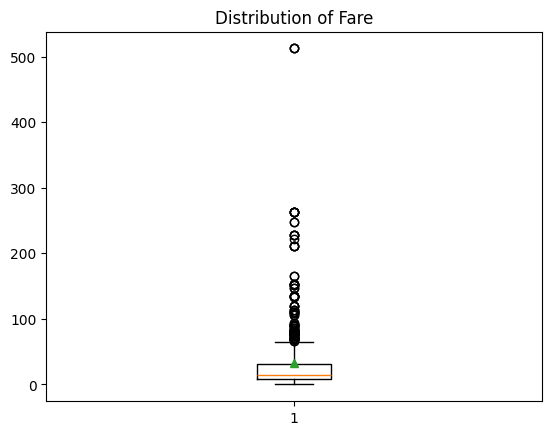

In [ ]:
plt.boxplot(x=titanic['fare'],showmeans=True)
plt.title('Distribution of Fare')

Text(0.5, 1.0, 'Distribution of Age of Passengers')

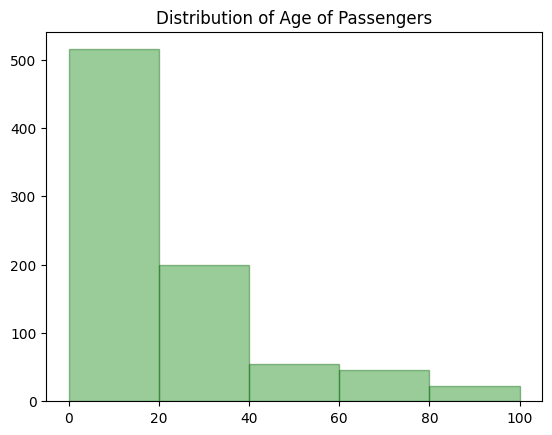

In [ ]:
b=[0,20,40,60,80,100]
plt.hist(x=titanic['fare'],bins=b,color='green',edgecolor='darkgreen',alpha=0.4,histtype='barstacked')
plt.title('Distribution of Age of Passengers')

Text(0.5, 1.0, 'Count of Survival By Gender')

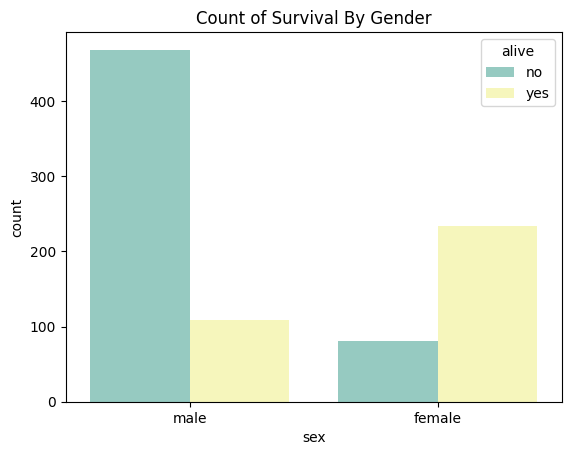

In [ ]:
sns.countplot(x=titanic['sex'],hue=titanic['alive'],palette='Set3')
plt.title('Count of Survival By Gender')

<ipython-input-28-9661b7d664e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sibsp', data=titanic, palette='Set1')


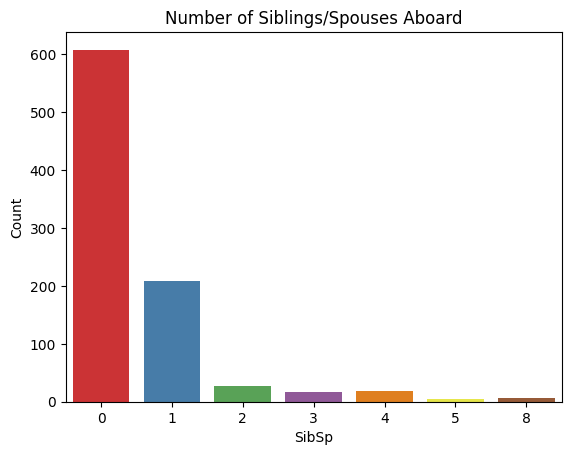

In [ ]:
sns.countplot(x='sibsp', data=titanic, palette='Set1')
plt.title('Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

<ipython-input-29-29ed220c69a7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parch', data=titanic, palette='Set1')


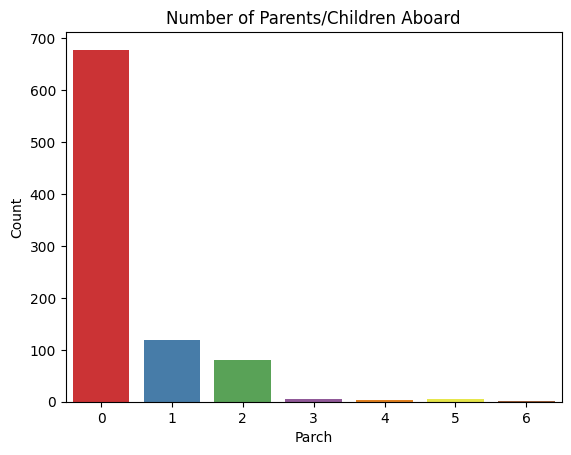

In [ ]:
sns.countplot(x='parch', data=titanic, palette='Set1')
plt.title('Number of Parents/Children Aboard')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Passenger across Classes')

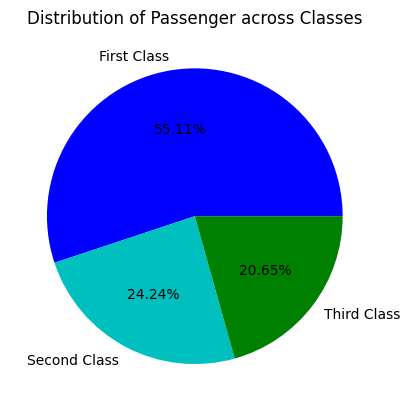

In [ ]:
plt.pie(x=titanic['class'].value_counts(),labels=['First Class','Second Class','Third Class'],colors=['b','c','g'],autopct='%1.2f%%')
plt.title('Distribution of Passenger across Classes')

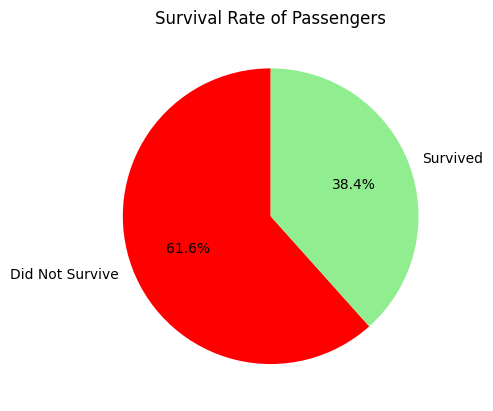

In [ ]:
survived_counts = titanic['survived'].value_counts()
survived_counts.plot.pie(autopct='%1.1f%%', colors=['red', 'lightgreen'], startangle=90, labels=['Did Not Survive', 'Survived'])
plt.title('Survival Rate of Passengers')
plt.ylabel('')
plt.show()

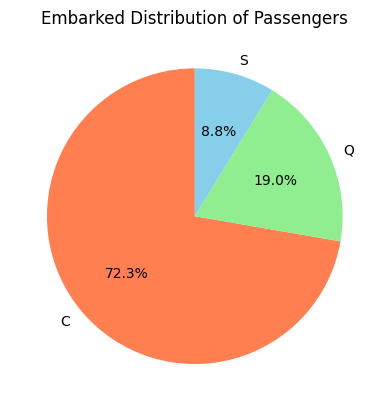

In [ ]:
embarked_counts = titanic['embarked'].value_counts()
embarked_counts.plot.pie(autopct='%1.1f%%', colors=['coral', 'lightgreen', 'skyblue'], startangle=90, labels=['C', 'Q', 'S'])
plt.title('Embarked Distribution of Passengers')
plt.ylabel('')
plt.show()

## Multiple Variable  Non-Graphical Summary

In [ ]:
t=titanic[['survived','pclass','age','fare']]

In [ ]:
t.corr()

,survived,pclass,age,fare
survived,1.000000,-0.338481,-0.069809,0.257307
pclass,-0.338481,1.000000,-0.331339,-0.549500
age,-0.069809,-0.331339,1.000000,0.091566
fare,0.257307,-0.549500,0.091566,1.000000


In [ ]:
titanic.agg({
    "fare":["min","max","mean","median","skew"]
})

,fare
min,0.000000
max,512.329200
mean,32.204208
median,14.454200
skew,4.787317


In [ ]:
pd.crosstab(titanic['survived'],titanic['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.crosstab([titanic['survived'],titanic['sex']],titanic['class'])

class            First  Second  Third
survived sex                         
0        female      3       6     72
         male       77      91    300
1        female     91      70     72
         male       45      17     47

In [ ]:
pd.crosstab(titanic['survived'],[titanic['sex'],titanic['class']])

sex      female               male             
class     First Second Third First Second Third
survived                                       
0             3      6    72    77     91   300
1            91     70    72    45     17    47

## Multiple Variable Graphical Summary

Text(0.5, 1.0, 'Distribution of Passenger By Gender and Fare')

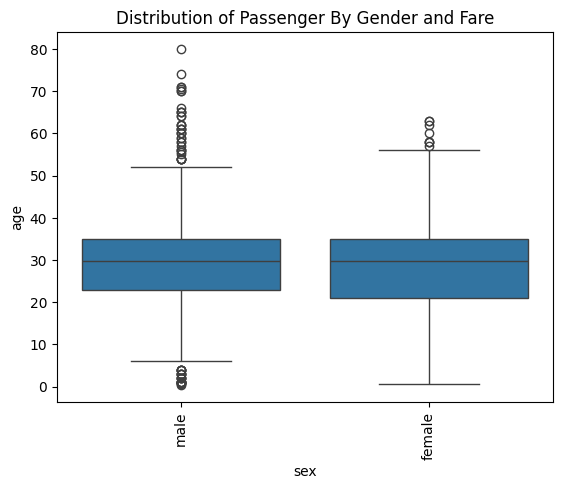

In [ ]:
sns.boxplot(y='age',x='sex',data=titanic)
plt.xticks(rotation=90)
plt.title('Distribution of Passenger By Gender and Fare')

Text(0.5, 1.0, 'Distribution of Fare')

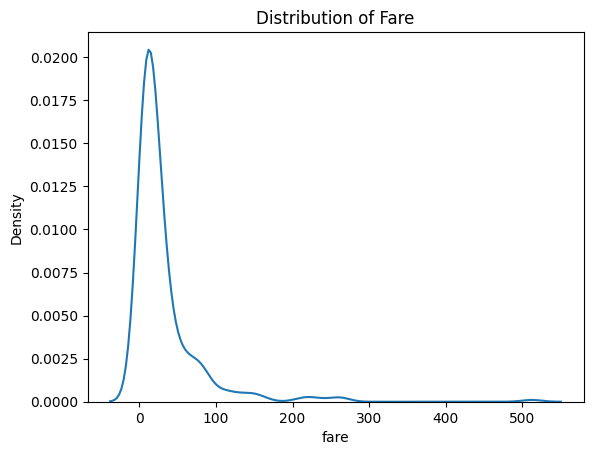

In [ ]:
sns.kdeplot(x=titanic['fare'])
plt.title('Distribution of Fare')

Text(0.5, 1.0, 'Distribution of Fare by Gender')

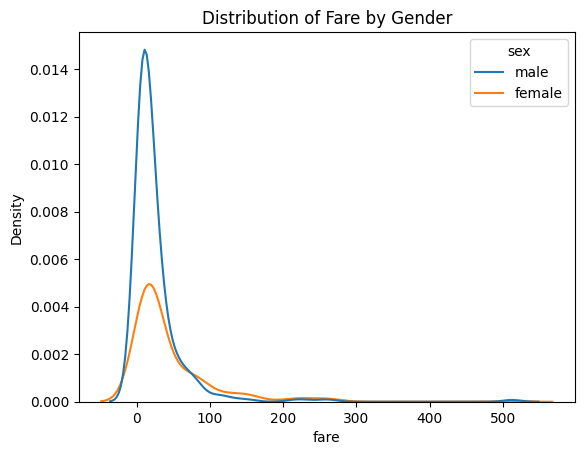

In [ ]:
sns.kdeplot(x=titanic['fare'],hue=titanic['sex'])
plt.title('Distribution of Fare by Gender')

Text(0.5, 1.0, 'Distribution of Age vs Fare')

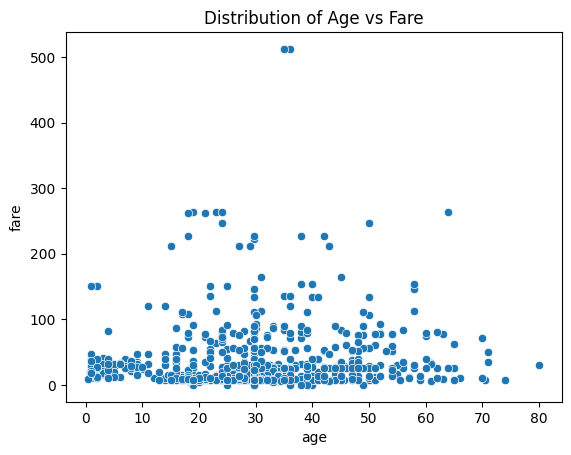

In [ ]:
sns.scatterplot(x='age',y='fare',data=titanic)
plt.title('Distribution of Age vs Fare')

Text(0.5, 1.0, 'Distribution of Age vs Fare by Class')

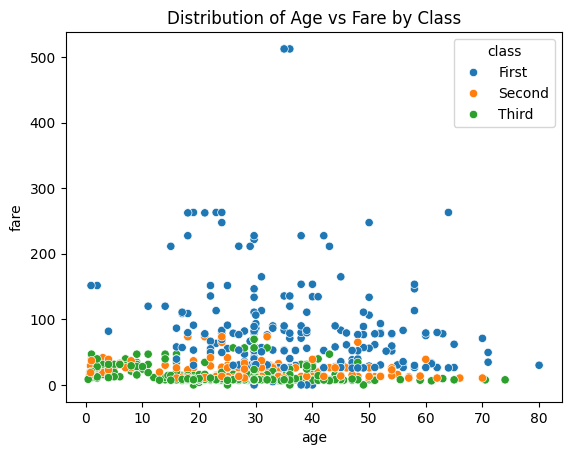

In [ ]:
sns.scatterplot(x='age',y='fare',hue='class',data=titanic)
plt.title('Distribution of Age vs Fare by Class')

Text(0.5, 1.0, 'Survival Rate by Deck vs Fare ')

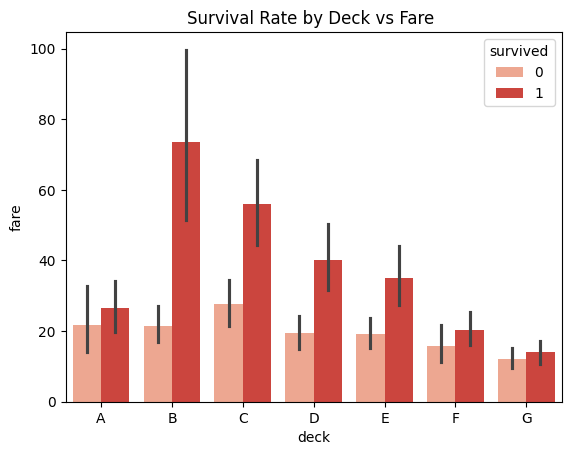

In [ ]:
sns.barplot(x='deck',y='fare',hue='survived',data=titanic,palette='Reds')
plt.title('Survival Rate by Deck vs Fare ')

<ipython-input-45-cb987b53f65e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=titanic['fare'],bins=5)


Text(0.5, 1.0, 'Distribution of Fare')

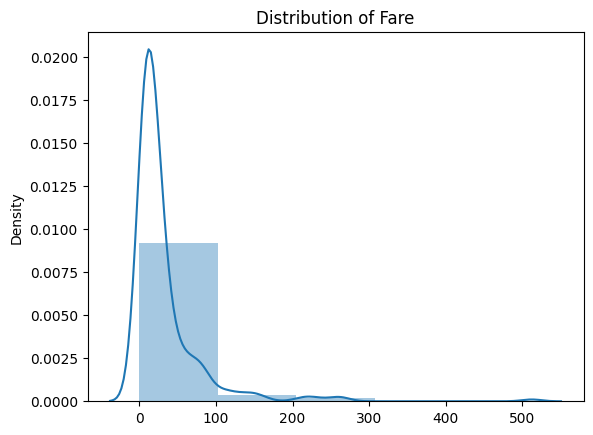

In [ ]:
sns.distplot(x=titanic['fare'],bins=5)
plt.title('Distribution of Fare')

Text(0.5, 1.0, 'Distribution of Fare by Pclass')

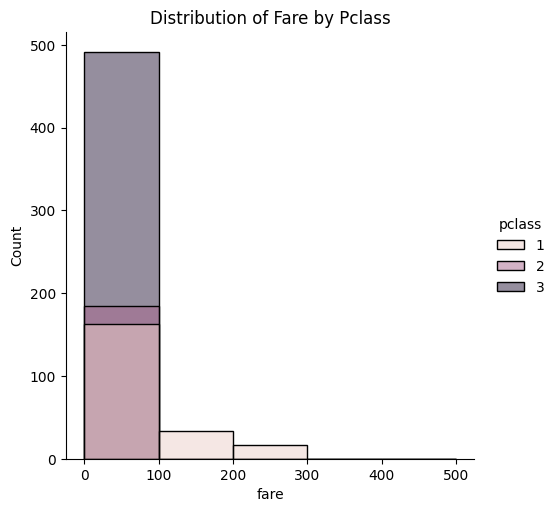

In [ ]:
b=[0,100,200,300,400,500]
sns.displot(x='fare',bins=b,hue='pclass',data=titanic)
plt.title('Distribution of Fare by Pclass')

Text(0.5, 0.98, 'Fare vs Age')

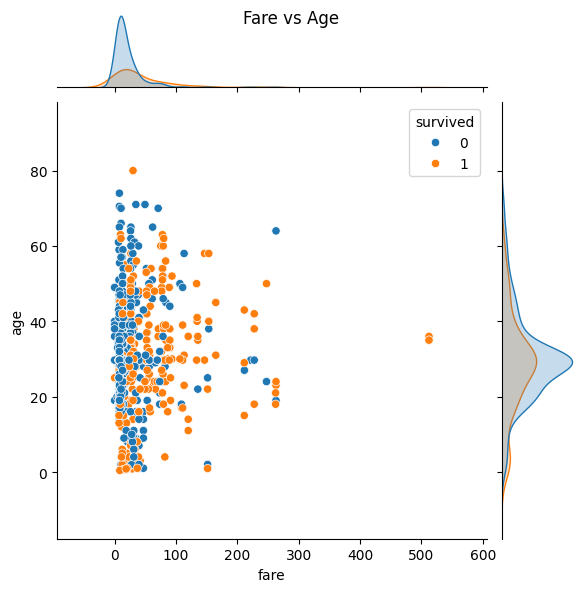

In [ ]:
sns.jointplot(x='fare',y='age',hue='survived',data=titanic)
plt.suptitle('Fare vs Age')

Text(0.5, 0.98, 'Fare vs Age')

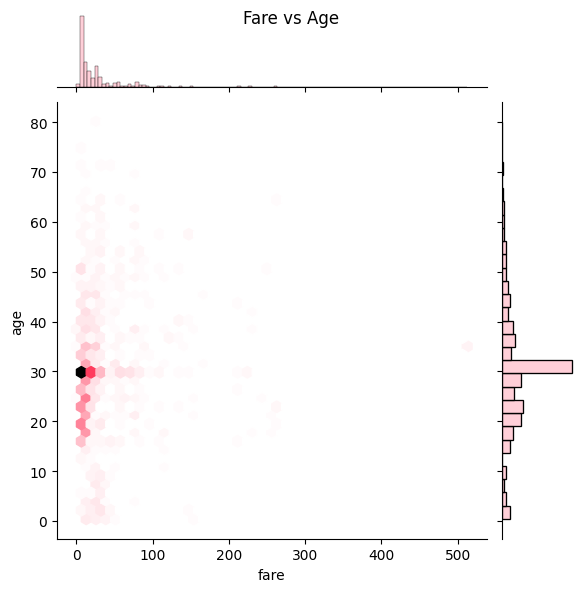

In [ ]:
sns.jointplot(x='fare',y='age',data=titanic,kind='hex',color='pink')
plt.suptitle('Fare vs Age')

Text(0.5, 1.0, 'Correlation Between various Factors')

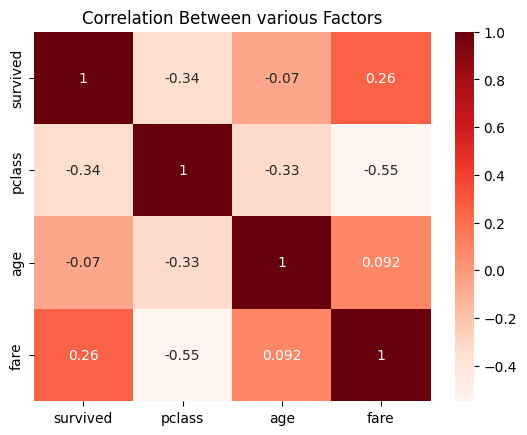

In [ ]:
t=titanic[['survived','pclass','age','fare']].corr()
sns.heatmap(t,annot=True,cmap='Reds')
plt.title('Correlation Between various Factors')